```{custom_download_link} scipy_exercises.ipynb
:text: "Download as ipynb"
:replace_default: "True"
```

(probability_python)=
# Probability in Python

This page gives a crash course in probability calculations in Python using continuous parametric distributions of `scipy.stats`.

```{tip}
Activate Python on this page using the rocket icon ({fa}`rocket`) above. Below the explanatory text there are a series of code cells that illustrate key aspects of `scipy.stats`. Make sure you experiment with the code cells, don't just run and read them. For example, try making the following changes:

1. Change parameter values
2. Change distribution types
3. Check the type of all objects
4. See if you can find alternative ways of writing code that generates the same output

```

## Key Concepts: Probability Theory

This book is primarily concerned with the use of continuous parametric distributions to make computations related to probability. A _distribution_ can thus be defined completely with the PDF or the CDF of a univariate random variable $X$

$$
f_X(x;\theta_1,\theta_2) \qquad F_X(x;\theta_1,\theta_2)
$$

where $\theta_1$ and $\theta_2$ denote (arbitrary) parameters of the distribution, which describe the shape of the PDF and CDF, respectively. Note the following about the distribution parameters::

1. In theory there is no limit on the number of parameters to define a distribution, although for practical purposes we consider mostly 2-parameter distributions.
3. The parameters of a distribution are usually formulated in a specific way to emphasize a particular physical interpretation; for example, the moments of the random variable or location, scale and shape of the distribution.
2. A common parameterization is location, scale and shape. This allows standardization of the distribution, for example, the location parameter translates the distribution, whereas the scale parameter stretches or compresses it.
4. For the Gaussian distribution, the parameters are typically the mean $\mu$ and $\sigma$, which are the moments of $X$ (first and second). These are also the location and scale parameters of a distribution.
5. For non-Gaussian distributions, there is no guarantee that the location, scale and shape parameters are equivalent to the moments or any other set of parameters used to define the distribution.

```{tip}
Always check that the implementation of a distribution in the software package you are using to make sure it is consistent with your expectations. This means checking the PDF and CDF as well as the definition of the parameters.
```

Once a distribution is defined, the list of calculations we make is relatively limited and includes the following:
1. Evaluate the CDF to obtain a probability $p=F_X(x)$
2. Use the inverse CDF to find the random variable value with a specific probability of non-exceedance $x=F_X^{-1}(p)$
3. Evaluate the PDF, which gives _density_ (not probability!) as the output of $f_X(x)$
4. Find parameters of a distribution using method of moments or MLE that best fit a given set of data
5. Convert between different parameterizations, for example, find the location and scale parameters from the moments of a random variable
6. Generate a random sample of $n$ realizations of random variable $X$ that follows its distributions $\{x_1, x_2, \ldots, x_n\}$
7. Perform qualitative and quantitative goodness of fit analyses to validate a selected distribution

Refer to other chapters of this book if any of the topics above are not clear.

### Multivariate Distributions

Although the examples above are for univariate cases, the multivariate case is analogous, with the following differences:
1. More than one random variable is considered, meaning it can be more challenging to integrate the _density_ function over a specific _regions of interest_ $\Omega$
2. Additional parameters are required to define the dependence between marginal random variables. The most simple model is a multivariate Gaussian distribution, which adds one parameter for every additional random variable beyond the second, the Pearson correlation coefficient $\rho_{i,j}$

## Key Concepts: `scipy.stats`

Commonly used distributions are implemented in `scipy.stats`, a module in the Python package Scipy. The module uses Object Oriented Programming to elegantly create a large number of distributions that behave in a predictable and numerically efficient way. This is accomplished via the _parent class_ `rv_continuous`, which defines a number of key _methods_, for example, `pdf`, `cdf`, `ppf`, `rvs` and `fit`, just to name a few. A specific distribution is created by simply defining the PDF of and _instantiating_ it as a child class of `rv_continuous`. _Inheritance_ ensures that the methods implemented in `rv_continuous` are available in _instances_ of the child class (our distribution!). Why is this important to understand?

1. All distributions in `scipy.stats` can be used in exactly the same way
2. It will help you interpret the Python Traceback when you encounter errors
3. You will better be able to prevent and identify logical errors (e.g., distribution parameters specified in the wrong order) 
4. It will help you understand how to search for information in the `scipy.stats` documentation

```{tip}
The documentation of `scipy.stats` can be intimidating, but this is primarily because it assumes the reader has a thorough knowledge of Python, probability theory _and_ Object Oriented Programming. One strategy to help you find the information you need is to check two places: 1) the page of the specific distribution you are interested in (for example, [Gumbel here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html)), and 2) the page describing the _parent class_ `rv_continuous` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

To easily find these pages, try typing a few key words into a search engine; for example, Googling "scipy stats gumbel" returns the pages linked here as the top search results.
```

Due to the OOP implentation, the conventional usage of a `scipy.stats` distribution is

```
<distribution_name>.<method>(<argument_1, argument_2, ...>)
```
where `distribution_name` is both the name of the distribution as well as the Python object itself (typically an instance of the distribution class) and `method` is a method of the class, which is typically associated with a calculation to make using the distribution. This will be illustrated below. For now, note the _methods_ in the table below that are common to _any_ `scipy.stats` distribution.

| Name    | Math    | `scipy.stats` Method | Conventional Usage | Returns |
| :---: | :---: | :---: | :---: | :---: |
| PDF | $f_X(x)$ | `pdf` | `.pdf(x)` | density |
| CDF | $F_X(x)$ | `cdf` | `.cdf(x)` | probability |
| Inverse CDF | $F_X^{-1}(x)$ | `ppf` | `.ppf(x)` | random variable value |
| Generate Sample of $X$ | $\{x_1, x_2, \ldots, x_n\}$ | `rvs` | `.rvs(size=n)` | sample (Numpy array) |
| Fit with MLE | $\{shape, loc, scale\}$ | `fit` | `.fit(data)` | tuple of parameters |
| Fit with Method of Moments | $\{loc, scale\}$ | `fit_loc_scale` | `.fit_loc_scale(data)` | tuple of parameters |

For **mutivariate** distributions, methods in the table above generally work exactly the same, accounting for differences in number of parameters and dimensionality of the random variables. This is illustrated in the examples below.

```{tip}
Python packages like `scipy.stats` rely heavily on Object Oriented Programming (OOP) to implement probability and statistics methods, and only a brief hint is provided here. Refer to {ref}`the OOP page of this book<oop>` to brush up on this topic in case anything here is unclear, for example, terms like _instance_, _parent class_ or _inheritance._
```

### Standard Parameterization

A distribution can be defined without specifying any parameters due to all distributions being implmented in `scipy.stats` in a standardized_ form. This means the _default_ values for the location and scale parameters are 0 and 1, respectively. Default values for shape parameters, when used, depend on the distribution parameterization. This means, for example, that the following two lines of code produce equivalent results:

```
stats.gumbel_r().cdf(1)
stats.gumbel_r(loc=0, scale=1).cdf(1)
```

Not all distributions have a shape parameter; if this is the case, the arguments are simply location and scale. When a shape parameter is required, it is usually the first parameter provided in the return of a function or required as an input argument. This often leads to logical errors when a location parameter is provided first, but the method expects a shape parameter.

````{tip}
To avoid memorizing the specific order of input arguments for every distribution, or having to constantly check the documentation, it is a good idea to specify the keyword argument of the parameter to guarantee that it is interpreted correctly (else an error will occur).

For example, do this:
```
stats.gumbel_r(loc=xxxx, scale=yyyy)
```
don't do this:
```
stats.gumbel_r(xxxx, yyyy)
```
Note also that the following two lines of code produce equivalent results:
```
stats.gumbel_r(lscale=1, loc=0).cdf(1)
stats.gumbel_r(loc=0, scale=1).cdf(1)
```
````

### Two Modes of Usage

There are two common ways to use `scipy.stats` distributions:
1. Evaluating a method of the distribution object directly
2. Defining a distribution as a variable, creating a _frozen_ distribution

#### Using a Method Directly

This simultaneously specifies the distribution (i.e., the distribution type and its parameters) and evaluates one of the methods. For example, consider the following line of code:

```
stats.gumbel_r(loc=1, scale=2).cdf(1)
```

You should be able to identify each of the following aspects; try reading through the list out loud and identifying each piece of the code that corresponds to the item:
1. Using the `stats` module of the `scipy` package...
2. define the Gumbel right distribution...
3. with parameter values 1 and 2 for the location and scale, respectively...
4. and evaluate the CDF at a random variable value of 1.

#### Frozen Distributions

The approach of evaluating a method directly can be efficient, but eventually becomes cumbersome if the distribution is used repeatedly, as the parameters need to be specified each time. In this case, one can create a _frozen_ distribution. This creates and instance of the distribution class where the parameters fixed at the values specified. Consider the following lines of code:

```
my_dist = stats.gumbel_r(loc=1, scale=2)
my_dist.cdf(1)
```

This returns the same value as the example above, except the parameters to not need to be specified again when evaluating the CDF as they are already incorporated in `my_dist`. Checking the `type` of this object would indicate that it is a frozen distribution:

```
type(my_dist) ---> scipy.stats._distn_infrastructure.rv_continuous_frozen
```

```{tip}
Frozen distributions are an example of a `scipy.stats` feature that is difficult to find in the documentation. It's actually buried in the `rv_continuous` page. See if you can find the explanation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html)!
```


## Interactive Examples

The concepts described above will now be put into practice.

In [ ]:
# `scipy.stats`: **Examples from MUDE Textbook**

# This notebook contains all of the cells from a page in the online textbook, but leaves out the text explanation at the top.

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

### General Usage

First let's create a toy data set to work with, which we will do by generating a random sample from the Gumbel right distribution. Note the following steps executed in the cell below:

1. Using the `stats` module of the `scipy` package...
2. Define the Gumbel right distribution...
3. Using default parameters...
4. Create a random sample of 1000 values...
5. and save it as an array `data`

In [32]:
data = stats.gumbel_r.rvs(size=1000)
print(f'Variable data is of type {type(data)} and has length {len(data)}.')

Variable data is of type <class 'numpy.ndarray'> and has length 1000


Note that you **must** specify the keywords argument, `size=n`, _not_ this: `stats.gumbel_r.rvs(5)`. Try it in a cell to see why.

The cell above follows the "use the methods directly" approach. We can also define the distribution as a frozen distribution:

In [33]:
frozen_dist = stats.gumbel_r()
print(f'Variable frozen_dist is of type {type(frozen_dist)}.')

Variable frozen_dist is of type <class 'scipy.stats._distn_infrastructure.rv_continuous_frozen'>.


We can use methods of the Numpy array class (and object `data`) to confirm that the moments of the data match the moments of the distribution from which it came.

In [38]:
print('The mean and standard deviation of the...')
print(f'sample (data): {np.mean(data):6.3f} and {np.std(data):6.3f}.')
print(f'distribution:  {frozen_dist.mean():6.3f} and {frozen_dist.std():6.3f}.')

The mean and standard deviation of the...
sample (data):  0.570 and  1.277.
distribution:   0.577 and  1.283.


As expected, the values are nearly identical; the small differences would decrease as the sample size goes towards infinity.

Let's check what the parameters of the distribution would be if we fit the Gumbel right distribution to the data.

In [47]:
parameters = stats.gumbel_r.fit(data)
print(f'Parameters are type {type(parameters)}')
print(f'Parameter values are {parameters[0]:6.3f} and {parameters[1]:6.3f}.')

Parameters are type <class 'tuple'>
Parameter values are -0.004 and  0.981.


The values, which are provided in a tuple, represent the location and scale of the distribution and are close to 0 and 1. This is logical because we did not specify any parameters when creating the sample in the first place, thus the _default_ values are 0 and 1, respectively.

We can specify alternative parameters and confirm that the location and scale have changed:

In [48]:
data_2 = stats.gumbel_r(loc=1, scale=2).rvs(size=1000)
parameters_2 = stats.gumbel_r.fit(data_2)
print(f'Parameters are type {type(parameters_2)}')
print(f'Parameter values are {parameters_2[0]:6.3f} and {parameters_2[1]:6.3f}.')

Parameters are type <class 'tuple'>
Parameter values are  0.955 and  2.016.


That was easy! Note that there is a handy Python feature called **tuple unpacking** which can be used to easily enter the parameters of a distribution as input arguments. Given a tuple `my_tuple`, the operator `*` "unpacks" all of the values from the tuple individually. For example, the code

```
my_tuple = (1, 'two', 4)
*my_tuple
```

returns `1 two 4`. This can be very useful when working with distributions, as we can do the following (illustrated for the CDF):

```
my_parameters = stats.<dist>.fit(data)
stats.<dist>.cdf(x, *my_parameters)
```
which evaluates the CDF at random variable values `x` given the parameters that fit the `data` (using MLE by default) for a generic distribution `<dist>`. Try it out in the following cell:

In [56]:
my_tuple = (1, 'two', 4)
print(*my_tuple)

stats.gumbel_r.cdf(2, *parameters_2)
print(f'The CDF at 2 is {stats.gumbel_r.cdf(2, *parameters_2):6.3f}.')

1 two 4
The CDF at 2 is  0.551.


 Now that we have two distributions, let's plot them, along with the data, using tuple unpacking to easily specify the parameters:

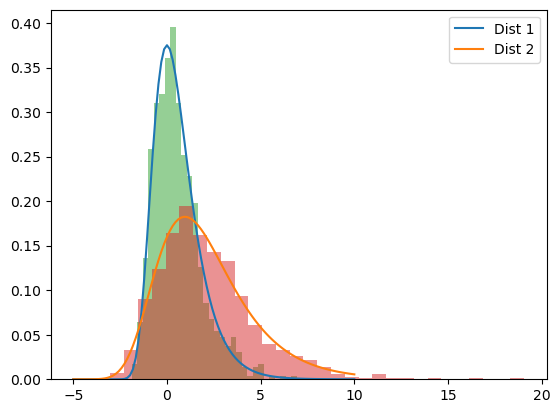

In [57]:
x = np.linspace(-5, 10, 100)
pdf_fitted = stats.gumbel_r.pdf(x, *parameters)
pdf_fitted_2 = stats.gumbel_r.pdf(x, *parameters_2)
plt.plot(x, pdf_fitted, label='Dist 1')
plt.plot(x, pdf_fitted_2, label='Dist 2')
plt.hist(data, density=True, bins=30, alpha=0.5)
plt.hist(data_2, density=True, bins=30, alpha=0.5)
plt.legend()
plt.show()

#### Illustration of a Common Error

It is easy to make mistakes when using `scipy.stats`. One common mistake is using the result of a `fit` method as if it were a distribution object. For example, defining the variable below and using the (non-existent) `cdf` method.

```
not_a_distribution = stats.gumbel_r.fit(data)
not_a_distribution.cdf()
```

If you cannot tell why this code is problematic, copy it into a cell and execute it to see what goes wrong! Hint: check `type(not_a_distribution)`.

### Comparing Math and Code

This section explicitly illustrates common mathematical expressions and the equivalent operations using Python. 

#### Univariate Case

Consider a random variable $X$ with moments (mean and standard deviation) $\mathbb{E}(X)=5$ and $\mathbb{Var}(X) = 2$ and we would like to fit a Gumbel right distribution using the method of moments. We can do this analytically as follows:

$$
\mathbb{V}ar(X)
= \cfrac{\pi^2}{6} \beta^2
\;\;\to\;\;
\beta
= \sqrt{\cfrac{6\mathbb{V}ar(X)}{\pi^2}}
=\sqrt{\cfrac{6 \cdot 4}{\pi^2}}
= 4.100
$$

$$
\mathbb{E}(X)
= \mu + \lambda \beta 
\;\;\to\;\;
\mu
= \mathbb{E}(X) - \lambda \beta
= 5 - 0.5772 \cdot 4.100 = 1.559
$$

In [58]:
var = 4
exp = 5
beta = np.sqrt(6*var/np.pi**2)
mu = exp - 0.5772*beta
print(f'Calculated mu and beta are {mu:6.3f} and {beta:6.3f}.')

Calculated mu and beta are  4.100 and  1.559.


By comparing the PDF $f_X(x)$ and CDF $F_X(x)$ in the book with the documentation of `scipy.stats`, we can see that the function and parameter definitions are consistent. Furthermore, by examining the PDF and CDF we can confirm that the parameters $\mu$ and $\beta$ are the location and scale parameters, respectively. Thus we can define the distribution as follows. Printing the values of the mean and standard deviation of the distribution confirm that we have correctly defined the function!

In [59]:
dist = stats.gumbel_r(loc=mu, scale=beta)
print(f'The mean and standard deviation of this distribution are {dist.mean():6.3f} and {dist.std():6.3f}.')

The mean and standard deviation of this distribution are  5.000 and  2.000.


There is an alternative way to (approximately) define the distribution based on the method of moments, even if you have neither data nor the analytic expression for the parameters (or perhaps you are lazy and don't want to solve the equations by hand, as done above). This approach involves the following steps:

1. Create an arbitrary sample of points with the desired mean and standard deviation (this is most easily done with `stats.norm.rvs()`)
2. Use the `fit_loc_scale` method to find the location and scale parameters of any distribution
3. Freeze the distribution with desired parameter values
4. Print the mean and standard deviation of the frozen distribution to verify that the distribution was defined with the correct moments

In [65]:
sample =  stats.norm.rvs(loc=5, scale=2, size=1000)
parameters = stats.gumbel_r.fit_loc_scale(sample)
dist = stats.gumbel_r(*parameters)
print(f'Parameters are type {type(parameters)}')
print(f'Parameter values are {parameters[0]:6.3f} and {parameters[1]:6.3f}.')
print(f'The moments sample are {np.mean(sample):6.3f} and {np.std(sample):6.3f}.')
print(f'The moments of the distribution are {dist.mean():6.3f} and {dist.std():6.3f}.')

Parameters are type <class 'tuple'>
Parameter values are  4.063 and  1.555.
The mean and standard deviation of the sample are  4.961 and  1.995.
The mean and standard deviation of the distribution are  4.961 and  1.995.


When using this approach, note that the accuracy of the fitted parameters is limited by the accuracy of the artificially created sample. For more precise results, one should use the analytic expressions for the parameters. Also, don't forget to use `fit_loc_scale` to enforce that the method of moments is used, instead of simply `fit`, which uses the MLE approach!

Next we will compute a probability of the previously found distribution, beginning with:

$$
p_1 = P[X\leq3] = F_X(3)
$$

followed by the complement

$$
p_2 = P[X>3] = 1 - P[X\leq3] = 1 - F_X(3)
$$

We can also use the inverse CDF to find the random variable value $x$ that has probability of non-exceedance equal to $p_1$

$$
x = F_X^{-1}(p_1) = 3
$$

which is the same value $x$ that has probability of exceedance $p_2$

$$
x = F_X^{-1}(1 - p_2) = 3
$$

In [67]:
p1 = dist.cdf(3)
p2 = 1 - dist.cdf(3)
x_of_p1 = dist.ppf(p1)
x_of_p2 = dist.ppf(1 - p2)
print(f'The probability of being less than 3 is {p1:6.3f}.')
print(f'The probability of being greater than 3 is {p2:6.3f}.')
print(f'The x value for p1 is {x_of_p1:6.3f}.')
print(f'The x value for p2 is {x_of_p2:6.3f}.')


The probability of being less than 3 is  0.138.
The probability of being greater than 3 is  0.862.
The x value for p1 is  3.000.
The x value for p2 is  3.000.


Let's illustrate what this looks like by plotting the calculated values and the CDF:

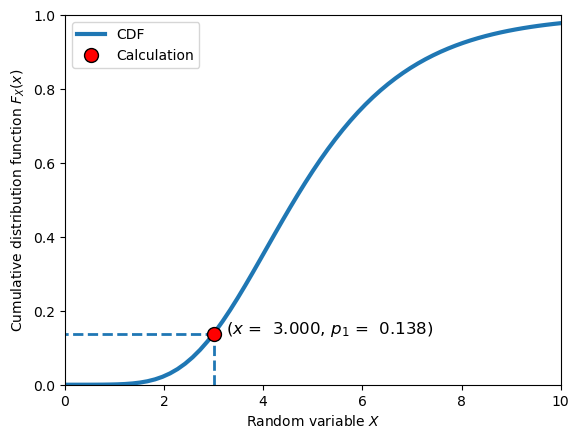

In [78]:
# create a plot of the cdf with the value calculated above
x = np.linspace(-5, 10, 100)
F_x = dist.cdf(x)
plt.plot(x, F_x, label='CDF', linewidth=3)
plt.vlines(x_of_p1, 0, p1, linestyles='--', linewidth=2)
plt.hlines(p1, -5, x_of_p1, linestyles='--', linewidth=2)
plt.plot(x_of_p1, p1, 'ro', label='Calculation',
         markeredgecolor='black', markersize=10)
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.legend()
plt.xlabel('Random variable $X$')
plt.ylabel('Cumulative distribution function $F_X(x)$')
plt.text(x_of_p1+.25, p1,
         f'($x$ = {x_of_p1:6.3f}, $p_1$ = {p1:6.3f})', fontsize=12,)
plt.show()


#### Multivariate Gaussian

Now a quick example with the Multivariate Gaussian distribution. In this example, we wish to define the distribution $f_{X_1,X_2}(x_1,x_2)$, for which we need to specify the _marginal_ distributions and the _correlation coefficient_ (or _covariance_). As the marginal distributions of the Multivariate Gaussian are also Gaussian, this is most easily done with the mean vector and covariance matrix (described elsewhere in the book).

Let's consider the situation where:

$$
\begin{align*}
X_1 &\sim N(\mu=8, \sigma=2) \\
X_2 &\sim N(\mu=5, \sigma=1)
\end{align*}
$$
with correlation 

$$
\rho_{X_1,X_2} = 0.5
$$

In [80]:
mean_vector = [8, 5]

std_x1 = 2
std_x2 = 1
correlation_coefficient = 0.5
covariance_matrix = [[std_x1**2, correlation_coefficient*std_x1*std_x2],
                     [correlation_coefficient*std_x1*std_x2, std_x2**2]]

bivariate_gaussian = stats.multivariate_normal(mean=mean_vector, cov=covariance_matrix)

print(f'Mean vector: {mean_vector}')
print(f'Covariance matrix: {covariance_matrix}')

Mean vector: [8, 5]
Covariance matrix: [[4, 1.0], [1.0, 1]]


Now we can use the distribution to create a sample, then check that it matches our expectation of the moments of marginal distributions. Note that _when sampling from a multivariate distribution we sample from the multivariate object, not the marginal distributions separately!_

In [84]:
sample = bivariate_gaussian.rvs(size=1000)
print(f'The sample has shape {sample.shape}.')
print(f'The sample mean of X1 is {np.mean(sample[:,0]):6.3f}.')
print(f'The sample mean of X2 is {np.mean(sample[:,1]):6.3f}.')

The sample has shape (1000, 2).
The sample mean of X1 is  7.958.
The sample mean of X2 is  4.969.


Computing a probability can be accomplished with the multivariate CDF:

$$
p = P[X_1\leq x_1, X_2\leq x_2] = F_{X_1,X_2}(x_1,x_2)
$$

The following cell computes the non-exceedance probability of the mean values of $X_1$ and $X_2$ and creates a plot to illustrate the computation (with the random samples included to illustrate the density):

$$
p = P[X_1\leq 8, X_2\leq 5] = F_{X_1,X_2}(8, 5)
$$

The probability of being less than 8 and 5 is  0.333.


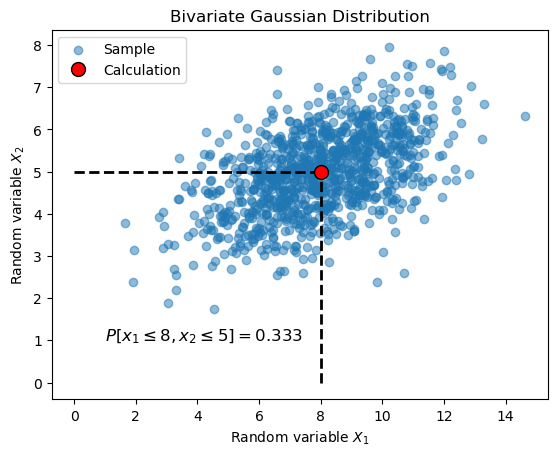

In [91]:
p = bivariate_gaussian.cdf([8, 5])
print(f'The probability of being less than 8 and 5 is {p:6.3f}.')

# create a bivariate plot with the samples and this value
plt.scatter(sample[:,0], sample[:,1], alpha=0.5, label='Sample')
plt.hlines(5, 0, 8, linestyles='--', linewidth=2, color='black')
plt.vlines(8, 0, 5, linestyles='--', linewidth=2, color='black')
plt.plot(8, 5, 'ro', label='Calculation',
         markeredgecolor='black', markersize=10)
plt.xlabel('Random variable $X_1$')
plt.ylabel('Random variable $X_2$')
plt.legend()
plt.title('Bivariate Gaussian Distribution')
plt.text(1, 1,
         f'$P[x_1 \\leq 8, x_2\\leq 5]=${p:5.3f}', fontsize=12,)
plt.show()

The probability computed by the CDF is the integration of the PDF over the lower left region of the random variable space, bounded by the dashed lines.

Recall that for the bivariate case the CDF is the double integral of the bivariate PDF:

$$
F_{X_1,X_2}(x_1,x_2) = \int_{-\infty}^{x_2}\int_{-\infty}^{x_1}f_{X_1,X_2}(x_1,x_2)\;\textrm{d}x_1\textrm{d}x_2
$$

Integrating over the domain of one variable produces the marginal distribution of the other:

$$
\int_{-\infty}^{+\infty}\int_{-\infty}^{x_1}f_{X_1,X_2}(x_1,x_2)\;\textrm{d}x_1\textrm{d}x_2
= F_{X_1}(x_1)
$$

We can easily do this in Python as follows, confirming our result with the understanding that for the marginal distribution, integrated the PDF below the mean (or evaluating the CDF at the mean) should return a value of 0.5.

In [93]:
p = bivariate_gaussian.cdf([8, 1000000])
print(f'The probability of X1 being less than 8 is {p:6.3f}.')

The probability of X1 being less than 8 is  0.500.


#### Multivariate Non-Gaussian

Here we use a Copula to describe dependence between $X_1$ and $X_2$. This is an example of a non-Gaussian multivariate distribution (bivariate, in this case). We will use the Clayton Copula to illustrate, as this can be simply defined in a Python function without any extra statistics or probability packages (in fact, it technically doesn't even require Numpy!).

_In this example we only illustrate the computation of the CDF, and not with an object oriented approach, as we don't want to import special packages in the book (we will do that in the in-class workshops)._

As with the Multivariate Gaussian case, we wish to define the distribution $f_{X_1,X_2}(x_1,x_2)$, for which we can specify the same _marginal_ distributions:

$$
\begin{align*}
X_1 &\sim N(\mu=8, \sigma=2) \\
X_2 &\sim N(\mu=5, \sigma=1)
\end{align*}
$$

The bivariate distribution when using a generic Copula, $C$, is defined by the marginal CDF's $F_{X_1}(x_1)$ and $F_{X_2}(x_2)$:

$$
F_{X_1, X_2}(x_1,x_2) = C[F_{X_1}(x_1), F_{X_2}(x_2)]
$$

The Clayton Copula is defined as follows, replacing the CDF's with $u$ and $v$, respectively, for simplicity:

$$
C[F_{X_1}(x_1), F_{X_2}(x_2)]
= C[u, v]
= \big[\mathrm{max}\{u^{-\theta}+v^{-\theta}-1; \; 0\}\big]^{-1/\theta}
$$

In this case, instead of the Pearson correlation coefficient (for multivariate Gaussian), dependence is parameterized by $\theta$. Although the values are not equivalent, $\theta$ behaves in a similar fashion to Pearson's $\rho$. Let's try out this bivariate distribution using:

$$
\theta = 0.5
$$

First we will define the Clayton Copula and evaluate it for the case of $F_{X_1}(x_1)=u=0.5$ and $F_{X_2}(x_2)=v=0.5$:

In [94]:
def C(F1, F2, theta):
    """
    COmpute bivariate CDF of Clayton copula for X1 and X2.

    Parameters:
    F1: CDF of the first marginal.
    F2: CDF of the second marginal.
    theta (float): Copula parameter.

    Returns: probability.
    """
    
    return (max(F1**(-theta) + F2**(-theta) - 1, 0))**(-1/theta)

p = C(0.5, 0.5, 0.5)
print(f'The probability calculated using the Clayton copula is {p:.4f}')

The probability calculated using the Clayton copula is 0.2991


Note that this value is not far off from the value of 0.333 computed with the bivariate Gaussian example above with $\rho=0.5$. As the marginal distributions are Gaussian, evaluating the Copula at values of 0.5 is equivalent to evaluating the random variable values at their median (and mean and mode for the Gaussian distribution).

We can define `scipy.stats` marginal distributions to create a function for the the complete multivariate distribution such that it can be evalutaed as the CDF:

In [98]:
def cdf(x):
    X1 = stats.norm(loc=5, scale=1)
    X2 = stats.norm(loc=8, scale=2)
    theta = 0.5
    return C(X1.cdf(x[0]), X2.cdf(x[1]), theta)

p = cdf([5, 8])
print(f'The probability calculated using the Clayton copula is {p:.4f}')

The probability calculated using the Clayton copula is 0.2991
